In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp

In [2]:
x = np.linspace(0,3,100)
f = 2*np.exp(-2*x)
F = 1 - np.exp(-2*x)

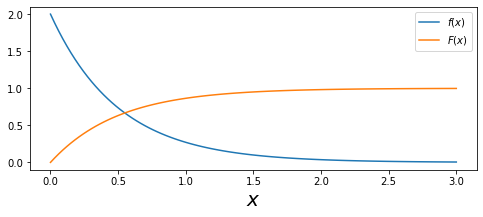

In [3]:
# F(x) is the "Cumlative" Density Function of X, following f(x).
plt.figure(figsize = (8,3))
plt.plot(x,f,label = r'$f(x)$')
plt.plot(x,F,label = r'$F(x)$')
plt.xlabel('$x$', fontsize = 20)
plt.legend()
plt.show()

In [4]:
# Inverse function of CDF is the probability density function of X, [0,1)
Us = np.random.rand(10000) # 10000 Random numbers between 0 to 1

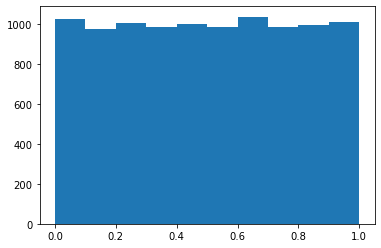

In [5]:
plt.hist(Us)
plt.show()

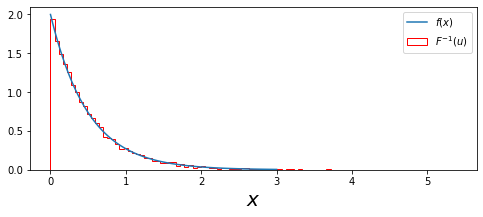

In [6]:
F_inv_Us = -np.log(1-Us)/2 # Inverse CDF and input random values!
plt.figure(figsize = (8,3))
plt.plot(x,f,label = r'$f(x)$')
plt.hist(F_inv_Us, histtype = 'step', color = 'red', density = 'norm', bins = 100, label = '$F^{-1}(u)$') 
# Make sure you normalize!!!
plt.legend()
plt.xlabel('$x$', fontsize = 20)
plt.legend()
plt.show()

In [7]:
x, y, F1, F2, E1, E2 = smp.symbols('x y F_1 F_2 E_1 E_2', real = True, positive = True)
fs = F1*smp.exp(-smp.sqrt(x/E1)) + F2*smp.exp(-smp.sqrt(x/E2))
fs

F_1*exp(-sqrt(x)/sqrt(E_1)) + F_2*exp(-sqrt(x)/sqrt(E_2))

In [8]:
# integrate(function, (variable,intial,final)).doit()
Fs = smp.integrate(fs, (x,0,y)).doit() # This is CDF!!
Fs

2*E_1*F_1 + 2*E_2*F_2 + F_1*(-2*sqrt(E_1)*sqrt(y)*exp(-sqrt(y)/sqrt(E_1)) - 2*E_1*exp(-sqrt(y)/sqrt(E_1))) + F_2*(-2*sqrt(E_2)*sqrt(y)*exp(-sqrt(y)/sqrt(E_2)) - 2*E_2*exp(-sqrt(y)/sqrt(E_2)))

In [9]:
#sympy.lambdify((variables), function) make it "numerical" function from symboric function!!
# So you can use it out of sympy now.
Fn = smp.lambdify((y,E1,E2,F1,F2), Fs)
fn = smp.lambdify((x,E1,E2,F1,F2), fs)

In [10]:
E1 = E2 = 0.2
F1 = 1.3
F2 = 1.4
x = np.linspace(0, 5, 1000)
f = fn(x, E1, E2, F1, F2)
F = Fn(x, E1, E2, F1, F2)

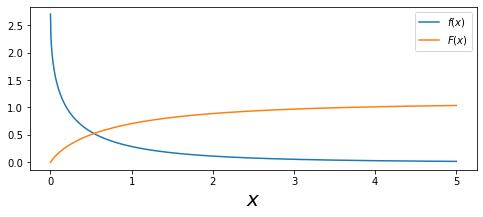

In [11]:
plt.figure(figsize = (8,3))
plt.plot(x,f,label = r'$f(x)$')
plt.plot(x,F,label = r'$F(x)$')
plt.xlabel('$x$', fontsize = 20)
plt.legend()
plt.show()

In [12]:
# np.searchsorted(array[:-1], numbers) gives you the index of the numbers AND keep it sorted!!
# So the code blow produce the inverse array F^-1(Us) from F(Us)
F_inv_Us = x[np.searchsorted(F[:-1], Us)]

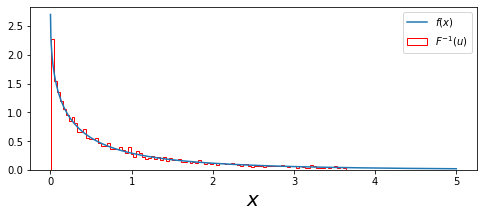

In [13]:
plt.figure(figsize = (8,3))
plt.plot(x,f,label = r'$f(x)$')
plt.hist(F_inv_Us, histtype = 'step', color = 'red', density = 'norm', bins = 100, label = '$F^{-1}(u)$') 
# Make sure you normalize!!!
plt.legend()
plt.xlabel('$x$', fontsize = 20)
plt.legend()
plt.show()

In [22]:
r = np.random.rayleigh(size = 1000)

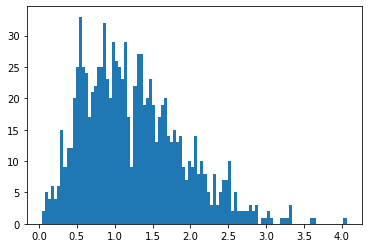

In [23]:
plt.hist(r, bins = 100)
plt.show()

In [24]:
#np.random?

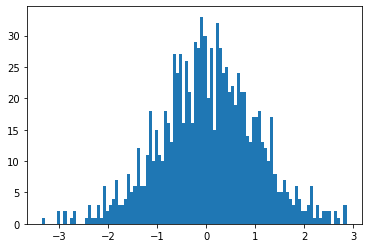

In [28]:
r = np.random.normal(size = 1000)
plt.hist(r, bins = 100)
plt.show()

In [29]:
N = 10000

# Part 1
X = np.random.poisson(lam = 4, size = N)

# part 2
x = np.linspace(0,5,1000)
F = Fn(x, E1, E2, F1, F2)
Us = np.random.rand(X.sum())
E = x[np.searchsorted(F[:-1], Us)]

In [30]:
idx = np.insert(X.cumsum(), 0, 0)[:-1] #これはindexを並べて累積させたもの！
idx[0:10]

array([ 0,  3,  6,  9, 13, 16, 20, 23, 26, 35])

In [31]:
E[0:10]# 各粒子の持つランダムなエネルギー

array([0.11011011, 0.2952953 , 1.92692693, 0.17517518, 0.97597598,
       1.93693694, 0.04504505, 0.46546547, 0.21521522, 0.91591592])

In [32]:
E_10s = np.add.reduceat(E, idx) #Eをidxの数だけ順に累積させていく

In [33]:
E_10s

array([2.33233233, 3.08808809, 0.72572573, ..., 1.93193193, 6.14114114,
       2.9029029 ])

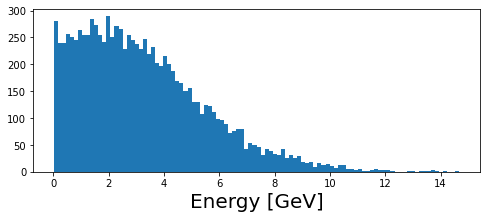

In [35]:
plt.figure(figsize = (8,3))
plt.hist(E_10s, bins=100)
plt.xlabel('Energy [GeV]', fontsize = 20)
plt.ylabel = ('# Occurences')
plt.show()

In [36]:
np.sum(E_10s>7.5)/len(E_10s)

0.0534